# ACF -- Ackerberg, Caves, Frazer
* This time, trying joint estimation
* Refer to ACF_simple_twostep for an easier version, which estimates $\Phi$ first with polynomial regression, then estimates the betas with GMM. 

# Review -- Two-Step Identification Procedure:
For a simple example, suppose $\omega_{it} = \rho \omega_{it-1} + \xi_{it}.$ Then
$g(x) = E[x|\omega_{it-1}] = \rho \omega_{it-1}.$ Assume labor is chosen after time $t-1$. Then the estimation procedure is: 

## (1) Regress $y_{it}$ on $\left(k_{it}, l_{it}, m_{it}\right)$ nonparametrically, or using a high-order polynomial, to obtain $\hat{\tilde \Phi}_t\left(k_{it}, l_{it}, m_{it}\right).$

We do this for every period to get a sequence of functions of $(k, l, m).$ These will be plugged in for $\Phi$ in the next step. 

## (2) Use the following four moment conditions to estimate the parameters $\left(\beta_0, \beta_k, \beta_l, \rho\right):$

$$
E\left[\left(y_{it} - \beta_0 - \beta_k k_{it} - \beta_l l_{it} - \rho\left(\tilde \Phi_{t-1}\left(k_{it-1}, l_{it-1}, m_{it-1}\right) - \beta_0 - \beta_k k_{it-1} - \beta_l l_{it-1}\right)\right) \otimes \begin{pmatrix} 1 \\ k_{it} \\ l_{it-1} \\ \tilde \Phi_{t-1}\left(k_{it-1}, l_{it-1}, m_{it-1}\right) \\ \end{pmatrix} \right] = 0
$$

Here's where we use GMM. 

# New version: Joint Identification

Now, we include the parameters used to fit $\Phi$ into the GMM estimation. 
We fit $\Phi$ with a $d$-degree polynomial, and the coefficients of that polynomial are identified by moments.
In ACF, equation (31) shows their joint estimation moment conditions: 

$$
    E\begin{bmatrix}
    \varepsilon_{it} \big| \mathcal I_{it} \\ 
    \xi_{it}+\varepsilon_{it} \big| \mathcal I_{it-1}                
    \end{bmatrix} = 
    E\begin{bmatrix}
    y_{it} - \tilde\Phi_t(k_{it}, l_{it}, m_{it}) \;\; \big| \;\; \mathcal I_{it} \\ 
    y_{it} - \beta_0 - \beta_k k_{it} - \beta_l l_{it} - g\left(\tilde \Phi_{t-1}\left(k_{it-1}, l_{it-1}, m_{it-1}\right) - \beta_0 - \beta_k k_{it-1} - \beta_l l_{it-1}\right) \;\; \big| \;\; \mathcal I_{it-1}                
    \end{bmatrix} 
$$

where $g(\cdot)$ is the conditional expectation of productivity and $\mathcal I_{it}$ is the information set of firm $i$ at time $t$.  

For each time t, the full $d$-degree polynomial fit of $y = \Phi_t(k, l, m)$ will have $\begin{pmatrix} k+d \\ k \end{pmatrix}$ coefficients, where $k$ is the number of variables (in this case 3). 

$$
\Phi_t^2(k, l, m) = \gamma_{0,0,0} + \gamma_{1,0,0}k + \gamma_{0,1,0}l + \gamma_{0,0,1}m + \gamma_{1,1,0}kl + \gamma_{1,0,1}km + \gamma_{0,1,1}lm + \gamma_{2,0,0}k^2 + \gamma_{0,2,0}l^2 + \gamma_{0,0,2}m^2
$$

But we need to fit $\Phi_t$ for each year. 

So, assuming $g(x) = \rho x$, the vector of parameters to identify is: 

$$
\mathbf \theta = \left[ \beta_0, \beta_k, \beta_l, \rho, \underbrace{\mathbf \gamma_{1}}_{kCd\times 1}, ...,  \underbrace{\mathbf \gamma_{T}}_{kCd\times 1}  \right]_{4 + T\cdot(kCd)}
$$

The first four parameters can be identified using the moments from the "simple" ACF:  

$$
E\left[\operatorname{vec}\left(y_{it} - \beta_0 - \beta_k k_{it} - \beta_l l_{it} - \rho\left(\tilde \Phi_{t-1}\left(k_{it-1}, l_{it-1}, m_{it-1}\right) - \beta_0 - \beta_k k_{it-1} - \beta_l l_{it-1}\right)\right) \otimes \begin{pmatrix} 1 \\ k_{it} \\ l_{it-1} \\ \tilde \Phi_{t-1}\left(k_{it-1}, l_{it-1}, m_{it-1}\right) \\ \end{pmatrix} \right] = 0
$$

Note that we will need to plug in the polynomial coefficients into the $\Phi$ here, from our parameter guess $\theta$. Also note that the final term with $\Phi$ in it is used as our moment for identifying $\rho$.

The $T\cdot(kCd)$ "gammas" can be estimated using the moments for linear regression, at each time period. Each of the vectors below is "Number of firms at time t"-by-1.

$$
\text{Regression at t=0:}\begin{pmatrix}
\mathbf 1^\intercal \left[ y_{i0} - \tilde\Phi_0(k_{i0}, l_{i0}, m_{i0})  \right] \\
 (k_{i0})^\intercal \left[ y_{i0} - \tilde\Phi_0(k_{i0}, l_{i0}, m_{i0})  \right] \\
 (l_{i0})^\intercal \left[ y_{i0} - \tilde\Phi_0(k_{i0}, l_{i0}, m_{i0})  \right] \\
 (m_{i0})^\intercal \left[ y_{i0} - \tilde\Phi_0(k_{i0}, l_{i0}, m_{i0})  \right] \\
(k_{i0}l_{i0})^\intercal \left[ y_{i0} - \tilde\Phi_0(k_{i0}, l_{i0}, m_{i0})  \right] \\
\vdots \\
 (l_{i0}^2)^\intercal \left[ y_{i0} - \tilde\Phi_0(k_{i0}, l_{i0}, m_{i0})  \right] \\
\end{pmatrix}
$$

$$
\text{Regression at t=T:}\begin{pmatrix}
\mathbf 1^\intercal \left[ y_{iT} - \tilde\Phi_T(k_{iT}, l_{iT}, m_{iT})  \right] \\
 (k_{iT})^\intercal \left[ y_{iT} - \tilde\Phi_T(k_{iT}, l_{iT}, m_{iT})  \right] \\
 (l_{iT})^\intercal \left[ y_{iT} - \tilde\Phi_T(k_{iT}, l_{iT}, m_{iT})  \right] \\
 (m_{iT})^\intercal \left[ y_{iT} - \tilde\Phi_T(k_{iT}, l_{iT}, m_{iT})  \right] \\
(k_{iT}l_{iT})^\intercal \left[ y_{iT} - \tilde\Phi_T(k_{iT}, l_{iT}, m_{iT})  \right] \\
\vdots \\
 (l_{iT}^2)^\intercal \left[ y_{iT} - \tilde\Phi_T(k_{iT}, l_{iT}, m_{iT})  \right] \\
\end{pmatrix}
$$
Here we have $T\cdot(kCd)$ moments fo the $T\cdot(kCd)$ "gammas." 

# Error function implementation. 
Let $X$ denote the polynomial regression design matrix and $\vec t$ denote the vector of times corresponding to each row in $X$. 

First, let $g(\tau): \;\text{time}\;\; \tau \to [\gamma_\tau^1, \gamma_\tau^l, ..., \gamma_\tau^{(M^2)}]$ denote the "time mapping" for the gammas. Using this mapping, construct 
a matrix $\Gamma = g(\vec t)$, whose rows correspond to the gammas associated with time of that each row's observation in  $X$. 

Then, $\Phi = \operatorname{row sum}\left(X*\Gamma\right)$, where $*$ denotes elementwise multiplication.  

Then, to calculate the errors for the regression moments, let $M_\tau$ denote a matrix of time dummies:

$$
M_\tau = \left[t==1 \big| t==2 \big| ... \big| t == T\right]_{Nobs \times T}
$$

We use this matrix to set equal to zero any observations that do not correspond with the current time. 

Then the GMM errors for the regression moments can be calculated using 

$$
\mathcal E_{\mathcal N_p\times T } = \left[\left(Y - \Phi\right) * M_\tau \right]^\intercal X = \begin{bmatrix}
1^\intercal\left[\left(Y-\Phi\right)\mathbf 1\left\{t=1\right\}\right] & \cdots & (m^2)^\intercal\left[\left(Y-\Phi\right)\mathbf 1\left\{t=1\right\} \right] \\
\vdots & \ddots & \vdots \\
1^\intercal\left[\left(Y-\Phi\right)\mathbf 1\left\{t=T\right\}\right] & \cdots & (m^2)^\intercal\left[\left(Y-\Phi\right)\mathbf 1\left\{t=T\right\} \right] \\
\end{bmatrix}
$$

where $Y$ is the vector of $y_{it}$ observations.We then "unravel" that matrix row-by-row into a vector, which is $\left(T\cdot \mathcal N_p\right)\times 1$, the same length as the total number of gammas. $\mathcal N_p = kCd$ is the number of polynomial terms.

To get the errors for the "beta" moments, follow the same procedure as in the two-step ACF. 


# Jacobian Implementation: 
Note -- my notation is inconsistent, here I am denoting the first time as time 0. The Jacobian of the regression errros with respect to $\theta$ is: 

$$
\begin{bmatrix}
    0_{\beta} & \begin{matrix}
    1^\intercal\frac{\partial\Phi_0}{\partial \gamma_0^1} & \cdots & 1^\intercal\frac{\partial\Phi_0}{\partial \gamma_0^{(m_0^2)}} \\
    \vdots & \ddots & \vdots \\
    (m_0^2)^\intercal\frac{\partial\Phi_0}{\partial \gamma_0^1} & \cdots & (m_0^2)^\intercal\frac{\partial\Phi_0}{\partial \gamma_0^{(m_0^2)}}
    \end{matrix} & 0 & \cdots & 0 \\  0_{\beta} &
    0 &     \begin{matrix}
    1^\intercal\frac{\partial\Phi_1}{\partial \gamma_1^1} & \cdots & 1^\intercal\frac{\partial\Phi_1}{\partial \gamma_1^{(m_1^2)}} \\
    \vdots & \ddots & \vdots \\
    (m_1^2)^\intercal\frac{\partial\Phi_1}{\partial \gamma_1^1} & \cdots & (m_1^2)^\intercal\frac{\partial\Phi_1}{\partial \gamma_1^{(m_1^2)}}
    \end{matrix} & \cdots & 0 \\  \vdots &
    \vdots & \vdots & \ddots & \vdots \\  0_{\beta} &
    0 & 0 & \cdots &  \begin{matrix}
    1^\intercal\frac{\partial\Phi_T}{\partial \gamma_T^T} & \cdots & 1^\intercal\frac{\partial\Phi_T}{\partial \gamma_T^{(m_T^2)}} \\
    \vdots & \ddots & \vdots \\
    (m_T^2)^\intercal\frac{\partial\Phi_T}{\partial \gamma_T^1} & \cdots & (m_T^2)^\intercal\frac{\partial\Phi_T}{\partial \gamma_T^{(m_T^2)}}
    \end{matrix}
\end{bmatrix}
$$

Evaluating all the partial derivatives, we get

$$
\begin{bmatrix}
    0_{\beta} & X(1)^\intercal X(1) & 0 & \cdots & 0 \\  0_{\beta} &
    0 &     X(2)^\intercal X(2) & \cdots & 0 \\  \vdots &
    \vdots & \vdots & \ddots & \vdots \\  0_{\beta} &
    0 & 0 & \cdots &   X(T)^\intercal X(T)
\end{bmatrix}
$$

where $X(\tau)$ represents the observations of the polynomial regressors in $X$ at time $t = \tau$. 

Next, let's find the Jacobian of the "beta" moment restrictions. The conditions are
$$
\left[ \begin{pmatrix} 1^\intercal \\ \operatorname{vec}(k_{it})^\intercal \\ \operatorname{vec}(l_{it-1})^\intercal \\ \operatorname{vec}\left(\tilde \Phi_{t-1}\left(k_{it-1}, l_{it-1}, m_{it-1}\right)\right)^\intercal \\ \end{pmatrix} \cdot  h(\theta, \mathbf y, \mathbf k, \mathbf l)  \right]_{4\times 1}
$$
where 
$$
h(\theta, \mathbf y, \mathbf k, \mathbf l) = \operatorname{vec}\left(y_{it} - \beta_0 - \beta_k k_{it} - \beta_l l_{it} - \rho\left(\tilde \Phi_{t-1}\left(k_{it-1}, l_{it-1}, m_{it-1}\right) - \beta_0 - \beta_k k_{it-1} - \beta_l l_{it-1}\right)\right).
$$
The Jacobian is: 

$$
\left[\frac{\partial e\left(\mathbf y, \mathbf k, \mathbf l|\theta\right)}{\partial \theta}\right] \equiv
$$




$$
= \begin{bmatrix} \begin{bmatrix}
1^\intercal\frac{ \mathbf \partial h(\theta, \mathbf y, \mathbf k, \mathbf l)}{\partial \beta_0} & 1^\intercal\frac{ \partial \mathbf h(\theta, \mathbf y, \mathbf k, \mathbf l)}{\partial \beta_k} & 1^\intercal\frac{ \partial \mathbf h(\theta, \mathbf y, \mathbf k, \mathbf l)}{\partial \beta_l} & 1^\intercal\frac{ \mathbf \partial h(\theta, \mathbf y, \mathbf k, \mathbf l)}{\partial \rho} \\
\operatorname{vec}(k_{it})^\intercal\frac{ \partial \mathbf h(\theta, \mathbf y, \mathbf k, \mathbf l)
}{\partial \beta_0} &\operatorname{vec}(k_{it})^\intercal \frac{ \partial \mathbf h(\theta, \mathbf y, \mathbf k, \mathbf l)
}{\partial \beta_k} &\operatorname{vec}(k_{it})^\intercal \frac{ \partial \mathbf h(\theta, \mathbf y, \mathbf k, \mathbf l)
}{\partial \beta_l} &\operatorname{vec}(k_{it})^\intercal  \frac{\partial \mathbf h(\theta, \mathbf y, \mathbf k, \mathbf l)
}{\partial \rho} \\
\operatorname{vec}(l_{it-1})^\intercal\frac{ \partial \mathbf h(\theta, \mathbf y, \mathbf k, \mathbf l)
}{\partial \beta_0} &\operatorname{vec}(l_{it-1})^\intercal \frac{ \partial \mathbf h(\theta, \mathbf y, \mathbf k, \mathbf l)
}{\partial \beta_k} &\operatorname{vec}(l_{it-1})^\intercal \frac{ \partial \mathbf h(\theta, \mathbf y, \mathbf k, \mathbf l)
}{\partial \beta_l} &\operatorname{vec}(l_{it-1})^\intercal  \frac{\partial \mathbf h(\theta, \mathbf y, \mathbf k, \mathbf l)
}{\partial \rho} \\
\operatorname{vec}(\Phi_{it-1})^\intercal\frac{ \partial \mathbf h(\theta, \mathbf y, \mathbf k, \mathbf l)
}{\partial \beta_0} &\operatorname{vec}(\Phi_{it-1})^\intercal \frac{ \partial \mathbf h(\theta, \mathbf y, \mathbf k, \mathbf l)
}{\partial \beta_k} &\operatorname{vec}(\Phi_{it-1})^\intercal \frac{ \partial \mathbf h(\theta, \mathbf y, \mathbf k, \mathbf l)
}{\partial \beta_l} &\operatorname{vec}(\Phi_{it-1})^\intercal  \frac{\partial \mathbf h(\theta, \mathbf y, \mathbf k, \mathbf l)
}{\partial \rho} 
\end{bmatrix} & 
\begin{bmatrix}
1^\intercal    \frac{ \partial \mathbf h(\theta, \mathbf y, \mathbf k, \mathbf l)
}{\partial \mathbf \gamma_0^1} & \cdots & 1^\intercal    \frac{ \partial \mathbf h(\theta, \mathbf y, \mathbf k, \mathbf l)
}{\partial \mathbf \gamma_T^{(m_T^2)}} \\
\operatorname{vec}(k_{it})^\intercal   \frac{ \partial \mathbf h(\theta, \mathbf y, \mathbf k, \mathbf l)
}{\partial \mathbf \gamma_0^1} & \cdots & \operatorname{vec}(k_{it})^\intercal \frac{ \partial \mathbf h(\theta, \mathbf y, \mathbf k, \mathbf l)
}{\partial \mathbf \gamma_T^{(m_T^2)}}  \\
\operatorname{vec}(l_{it-1})^\intercal   \frac{ \partial \mathbf h(\theta, \mathbf y, \mathbf k, \mathbf l)
}{\partial \mathbf \gamma_0^1} & \cdots & \operatorname{vec}(l_{it-1})^\intercal \frac{ \partial \mathbf h(\theta, \mathbf y, \mathbf k, \mathbf l)
}{\partial \mathbf \gamma_T^{(m_T^2)}} \\ 
\operatorname{vec}\left(\frac{\partial\Phi_{it-1}}{\partial \gamma_0^1}\right)^\intercal \mathbf h(\theta, \mathbf y, \mathbf k, \mathbf l) + \operatorname{vec}(\Phi_{it-1})^\intercal \frac{ \partial \mathbf h(\theta, \mathbf y, \mathbf k, \mathbf l)
}{\partial \mathbf \gamma_0^1} & \cdots & \operatorname{vec}\left(\frac{\partial\Phi_{it-1}}{\partial \gamma_T^{(m_T^2)}}\right)^\intercal \mathbf h(\theta, \mathbf y, \mathbf k, \mathbf l) + \operatorname{vec}(\Phi_{it-1})^\intercal \frac{ \partial \mathbf h(\theta, \mathbf y, \mathbf k, \mathbf l)
}{\partial \mathbf \gamma_T^{(m_T^2)}}
\end{bmatrix}
\end{bmatrix} 
$$


$$
\begin{bmatrix} \begin{bmatrix} 1^\intercal \\ \operatorname{vec}(k_{it})^\intercal \\ \operatorname{vec}(l_{it-1})^\intercal  \\ \operatorname{vec}(\Phi_{it-1})^\intercal \end{bmatrix}_{4\times n} \times \begin{bmatrix} \frac{\partial \mathbf h}{\partial \beta_0} & \frac{\partial \mathbf h}{\partial \beta_k} & \frac{\partial \mathbf h}{\partial \beta_l} & \frac{\partial \mathbf h}{\partial \rho} & \frac{\partial \mathbf h}{\partial \gamma_0^1} & \frac{\partial \mathbf h}{\partial \gamma_0^k} & \frac{\partial \mathbf h}{\partial \gamma_0^l} & \cdots & \frac{\partial \mathbf h}{\partial \gamma_T^{(m^2)}}  \end{bmatrix}_{nx(4+T*\mathcal N_p)}
\end{bmatrix}  
$$


# Calculating the derivatives of h:

$$
\mathbf h = \operatorname{vec}\left(y_{it} - \beta_0 - \beta_k k_{it} - \beta_l l_{it} - \rho\left(\tilde \Phi_{t-1}\left(k_{it-1}, l_{it-1}, m_{it-1}\right) - \beta_0 - \beta_k k_{it-1} - \beta_l l_{it-1}\right)\right)
$$

$$
\frac{\partial \mathbf h}{\partial \beta_0} =  -1 + \rho
$$
$$
\frac{\partial \mathbf h}{\partial \beta_k} = -\operatorname{vec}(k_{it}) + \rho\operatorname{vec}(k_{it-1})
$$
$$
\frac{\partial \mathbf h}{\partial \beta_l} = -\operatorname{vec}(l_{it}) + \rho\operatorname{vec}(l_{it-1})
$$
$$
\frac{\partial \mathbf h}{\partial \rho} = \operatorname{vec}\left( - \left(\tilde \Phi_{t-1}\left(k_{it-1}, l_{it-1}, m_{it-1}\right) - \beta_0 - \beta_k k_{it-1} - \beta_l l_{it-1}\right)\right) 
$$
$$
\frac{\partial \mathbf h}{\partial \gamma_0^1} = -\rho \frac{\partial \mathbf \Phi_\text{prev}}{\partial \gamma_0^1} = 1 * \mathbf 1\left( t_\text{prev} == 0 \right)
$$
$$
\frac{\partial \mathbf h}{\partial \gamma_0^k} = -\rho \frac{\partial \mathbf \Phi_\text{prev}}{\partial \gamma_0^1} = k_\text{prev} * \mathbf 1\left( t_\text{prev} == 0 \right)
$$
... for arbitrary polynomial term $x$ and time $\tau$... 
$$
\frac{\partial \mathbf h}{\partial \gamma_\tau^x} = -\rho \frac{\partial \mathbf \Phi_\text{prev}}{\partial \gamma_0^1} = x_\text{prev} * \mathbf 1\left( t_\text{prev} == \tau \right)
$$


$$
\begin{bmatrix} \begin{bmatrix} 1^\intercal \\ \operatorname{vec}(k_{it})^\intercal \\ \operatorname{vec}(l_{it-1})^\intercal  \\ \operatorname{vec}(\Phi_{it-1})^\intercal \end{bmatrix}_{4\times n} \times 
\begin{bmatrix} 
\frac{\partial \mathbf h}{\partial \beta_0} & \frac{\partial \mathbf h}{\partial \beta_k} & \frac{\partial \mathbf h}{\partial \beta_l} & \frac{\partial \mathbf h}{\partial \rho} & -\rho 1 * \mathbf 1\left( t_\text{prev} == 0 \right) & -\rho k_\text{prev} * \mathbf 1\left( t_\text{prev} == 0 \right) & \cdots & -\rho x_\text{prev} * \mathbf 1\left( t_\text{prev} == \tau \right) & \cdots &  -\rho m^2_\text{prev}*\mathbf 1\left(t_\text{prev} == T\right) \end{bmatrix}_{n\times(4+T*\mathcal N_p)}
\end{bmatrix}  
$$

$$
+  \mathbf h(\theta, \mathbf y, \mathbf k, \mathbf l)^\intercal \begin{bmatrix} 
0 & 0 & 0 & 0 &  1 * \mathbf 1\left( t_\text{prev} == 0 \right) &  k_\text{prev} * \mathbf 1\left( t_\text{prev} == 0 \right) & \cdots &  x_\text{prev} * \mathbf 1\left( t_\text{prev} == \tau \right) & \cdots &   m^2_\text{prev}*\mathbf 1\left(t_\text{prev} == T\right) \end{bmatrix}
$$


We can impement this part of the Jacobian by creating a matrix of time dummies for $tprev == t$ then multiplying the polynomial design matrix constructed of $kprev, lprev, mprev$. 

Let $M_{t_{prev}}$ be the matrix of time dummies which, for all times $\tau$, tells us which observations are at $tprev == \tau$.  The part with the regression moments is then 

$$
-\rho X_{prev} * \begin{bmatrix}
 \mathbf 1 \left\{t_{prev}==0\right\} & \mathbf 1 \left\{t_{prev}==1\right\} & \cdots & \mathbf 1 \left\{t_{prev}==T\right\} 
\end{bmatrix}
$$


# Load in the data


In [39]:
import autograd.numpy as np
from autograd import grad
import pandas as pd
import scipy.optimize as opt
import matplotlib.pyplot as plt
import math
from itertools import combinations_with_replacement, chain
from scipy.linalg import block_diag

In [40]:
filename = "../PS3_data_changedtoxlsx.xlsx"
df0 = pd.read_excel(filename)

df = df0[['year', 'firm_id', 'X03', 'X04', 'X05', 'X40', 'X43', 'X44']]
#new_names = ["year", "firm_id", "obs", "ly", "s01", "s02", "lc", "ll", "lm"]
new_names = ["t", "firm_id", "y", "s01", "s02", "k", "l", "m"]

df.columns = new_names
#Keep industry 1 only
df=df[df['s02']==1]
#Creating lagged variables
df = df.sort_values(by=['firm_id', 't'])
df['kprev'] = df.groupby('firm_id')['k'].shift(1)
df['lprev'] = df.groupby('firm_id')['l'].shift(1)
df['mprev'] = df.groupby('firm_id')['m'].shift(1)
df['tprev'] = df.groupby('firm_id')['t'].shift(1)

# First step of coding: Write functions for the estimation of $\tilde \Phi_t.$

In [42]:
#This thing creates an iterator structure of tuples, used to create 
#the design matrix of polynomial interaction terms. 
def poly_terms(n_features, degree):
    #It looks something like this
    #(0,), (1,), (2,), (0, 0), (0, 1), etc 
    polynomial_terms = chain(
        *(combinations_with_replacement(range(n_features), d) for d in range(1, degree+1))
    )
    return(polynomial_terms)

#Create design matrix for the polynomial fit
def poly_design_matrix(xvars, degree):
    #In case there's only one variable to fit
    if xvars.ndim == 1:
        xvars = xvars.reshape(1, -1)
    # Get the number of samples (n) and number of features (m) from X
    n_samples, n_features = xvars.shape
    # Create polynomial terms iterator
    polynomial_terms = poly_terms(n_features, degree)
    # Start with a column of ones for the intercept term
    X_poly = np.ones((n_samples, 1))
    # Generate polynomial terms and interaction terms up to 4th degree
    for terms in  polynomial_terms:  # For degrees 1 to 4
            X_poly = np.hstack((X_poly, np.prod(xvars[:, terms], axis=1).reshape(-1, 1)))
    return X_poly

def fit_phi_poly(y, xvars, degree):
    #Get number of observations (n) and number of independent variables (k)
    #y = y.to_numpy()
    #DATA = DATA.to_numpy()
    if xvars.ndim == 1:
        xvars.reshape(1, -1)
    # Get the number of samples (n) and number of features (m) from X
    n_samples, n_features = xvars.shape
    
    # Start with a column of ones for the intercept term
    X_poly = np.ones((n_samples, 1))

    #Create iterator used to construct polynomial terms
    polynomial_terms = poly_terms(n_features, degree)
    
    # Generate polynomial terms and interaction terms up to 4th degree
    for terms in  polynomial_terms:  # For degrees 1 to 4
            X_poly = np.hstack((X_poly, np.prod(xvars[:, terms], axis=1).reshape(-1, 1)))
    
    # Compute the coefficients using the normal equation: beta = (X.T * X)^(-1) * X.T * y
    XT_X = X_poly.T @ X_poly
    XT_X_inv = np.linalg.inv(XT_X)
    XT_y = X_poly.T @ y
    gamma = XT_X_inv @ XT_y

    return gamma


#Create the matrix MT, which is used for year-by-year evaluation of the regression moments. 
def time_indexing(df, X_poly, degree):
    #Times and indexing
    times = np.unique(np.concatenate((df['t'].to_numpy(), df['tprev'].to_numpy()))) #get unique times in the sample
    #times = times[times != 0]
    T = len(times) #Number of unique times in the sample
    NPolyTerms= X_poly.shape[1] #Number of terms in the polynomial
    time_to_index = {time: idx for idx, time in enumerate(times)} # Create a dictionary mapping time values to the row index in G
    #Create a Nobs*T matrix of time dummies, used to create the error terms for GMM
    # Initialize the dummy matrix
    time_dummies = np.zeros((X_poly.shape[0], T))
    for i, t in enumerate(df['t']):
        time_index = np.where(times == t)[0][0]  # Find the index of the time in unique_times
        time_dummies[i, time_index] = 1
    #Previous time dummies
    time_dummies_prev = np.zeros((X_poly.shape[0], T))
    for i, t in enumerate(df['tprev']):
        if not np.isnan(t):
            if t>=min(times):
                time_index = np.where(times == t)[0][0]  # Find the index of the time in unique_times
                time_dummies_prev[i, time_index] = 1
    return T, NPolyTerms, times, time_to_index, time_dummies, time_dummies_prev  


def fit_phi_poly_years(df, degree):
    years = np.unique(df[["t"]])
    #Dictionary for storing the polynomial fits associated with each year
    phi_beta_dict = {}
    for t in years: 
        #Get data for the current year
        df_t = df[df["t"] == t]
        y_t = df_t[["y"]].to_numpy()
        DATA_t = df_t[['k', 'l', 'm']].to_numpy()
        #fit the polynomial
        beta_t = fit_phi_poly(y_t, DATA_t, degree)
        phi_beta_dict[t] = beta_t
    return phi_beta_dict


def calculate_Phi(X_poly, Xprev_poly, gammas, times, Nobs, T, NPolyTerms):
    #Calculating Phi
    #Reshaope the gammas into a dictionary, indexed by time t of the observations. 
    Gamma_1_to_T = gammas.reshape(T, NPolyTerms) #This fills rows with K observations, then columns. 
    #Now, construct a mapping from GAMMA, whose rows are indexed by T, to the times in the sample
    GAMMA = np.zeros((Nobs, T))
    GAMMA_prev = np.zeros((Nobs, T))
    times_prev = times+1
    #I need to use these really long lines of code because Autograd does not like loops
    GAMMA = np.array([Gamma_1_to_T[t[row] == times].reshape(1, T) if np.any(t[row] == times) else np.zeros((1, T)) for row in range(Nobs)]).reshape(Nobs, T)
    GAMMA_prev = np.array([Gamma_1_to_T[t[row] == times_prev].reshape(1, T) if np.any(t[row] == times_prev) else np.zeros((1, T)) for row in range(Nobs)]).reshape(Nobs, T)
    #GAMMA_prev[row,:] = Gamma_1_to_T[t[row] == times_prev, :]
    #GAMMA = np.vstack([Gamma_1_to_T[time_to_index[t]] for t in df['t']])
    #Now, evaluate Phi given the thetas.
    #To do this, elementwise-multiply the X with the polynomal coefficients in GAMMA. Sum the rows. 
    Phi = np.sum(X_poly*GAMMA, axis = 1)
    Phiprev = np.sum(Xprev_poly*GAMMA_prev, axis = 1)
    
    return Phi, Phiprev

#creates the first term in the moment restrictions:
def moment_error_ACF(theta, args_ykl, args_X, args_time_index, degree):
    #Load in argumetns
    #print("args_ykl:", args_ykl)
    y, k, l, kprev, lprev, t = args_ykl 
    X_poly, Xprev_poly, block_dgamma, Vex, Jac_bottomblock = args_X
    T, NPolyTerms, times, time_to_index, time_dummies, time_dummies_prev = args_time_index
    #Reshape parameters theta. 
    #A lot of this code is repeated from moment_error_ACF -- Clean up later
    Nobs = df.shape[0]
    #Get useful indexes
    #Reshape parameters theta. 
    betas = theta[:4] #extract beta_0, beta_k, beta_l, and rho
    gammas = theta[4:] #extract the guesses for the polynomial fit coefficeints (gammas).
    #Calculate Phi
    Phi, Phiprev = calculate_Phi(X_poly, Xprev_poly, gammas, times, Nobs, T, NPolyTerms)
    #Calculating errors
    y_minus_Phi = y - Phi
    Y_MINUS_PHI = np.repeat(y_minus_Phi[:, np.newaxis], 10, axis=1)
    #Matrix of errors corresponding with regression moments (Nobs x T)
    Epsilon = (X_poly).T @ (Y_MINUS_PHI*time_dummies)
    epsilons = Epsilon.reshape(Epsilon.size)
    #Now calculate the moment restrictions vector for the betas. 
    moments_betas = (y - theta[0] - theta[1]*k - theta[2]*l - 
             theta[3]*(Phiprev - theta[0] - theta[1]*kprev- theta[2]*lprev ) )
    #Matrix of exclusion restrictions
    #Next, create the portion of the Jacobian related to the moments which identify the betas.
    #Evaluate the errors
    Vex = np.vstack([
    np.ones(Nobs), 
    k, 
    lprev,
    Phiprev
    ])
    err_betas = Vex@moments_betas
    #Put together all of the errors into a single vector. 
    error_vec = np.concatenate((err_betas, epsilons))
    return error_vec

def gmm_obj_ACF(theta, args_ykl, args_X, args_time_index, degree, W):
    #Arguments
    #Get the vector h(theta, y, k, l)
    moment_error = moment_error_ACF(theta, args_ykl, args_X, args_time_index, degree)
    #Calculate the weighted sum of the error using the weight matrix, W
    obj = moment_error.T@W@moment_error
    return obj

def gradient_ACF(theta, args_ykl, args_X, args_time_index, degree, W):
    #A lot of this code is repeated from moment_error_ACF -- Clean up later
    #Loading in 
    #for item in args_ykl:
    #    print(item)
    y, k, l, kprev, lprev, t = args_ykl 
    X_poly, Xprev_poly, block_dgamma, Vex, Jac_bottomblock= args_X
    T, NPolyTerms, times, time_to_index, time_dummies, time_dummies_prev = args_time_index
    
    Nobs = X_poly.shape[0]
    #Get useful indexes
    #Reshape parameters theta. 
    betas = theta[:4] #extract beta_0, beta_k, beta_l, and rho
    gammas = theta[4:] #extract the guesses for the polynomial fit coefficeints (gammas).
    #Reshaope the gammas into a dictionary, indexed by time t of the observations. 
    Phi, Phiprev = calculate_Phi(X_poly, Xprev_poly, gammas, times, Nobs, T, NPolyTerms)
    
    #Now calculate the moment restrictions vector for the betas. 
    moments_betas = (y - theta[0] - theta[1]*k - theta[2]*l - 
             theta[3]*(Phiprev - theta[0] - theta[1]*kprev- theta[2]*lprev ) )

    #Now we have Phi, Phiprev, and "moments_betas"(h). 
    #Next, calculate the Jacobian 
    Jac = np.zeros((theta.size, theta.size))

    #Next, create the portion of the Jacobian related to the moments which identify the betas.
    #Matrix of exclusion restrictions
    #now get dMomentsBeta/dBeta
    #Partial derivatives of h
    Dh = np.nan_to_num(np.vstack(
        [
         np.ones(Nobs)*(-1 + theta[3]), #dh/dbeta0  
         -k + theta[3]*kprev,             #dh/dbetak
         -l + theta[3]*lprev,             #dh/dbetal
         -(Phiprev - theta[0] - theta[1]*kprev - theta[2]*lprev)
        ]
    ),  nan=0).T
    #Get the vector h(theta, y, k, l)
    moment_error = moment_error_ACF(theta, args_ykl, args_X, args_time_index, degree = 2)
    #Calculate the weighted sum of the error using the weight matrix, W
    obj = moment_error.T@W@moment_error
    #now for dMomentsBeta/dGamma
    #Need the polynomial design matrix associated with kprev, lprev, mprev    
    #Get the top block of the Jacobian (except one missing term)
    Vex = np.vstack([
        np.ones(Nobs), 
        k, 
        lprev,
        Phiprev
    ])
    Jac_topblock_almost = Vex@np.hstack((Dh, -theta[3]*block_dgamma))
    #Final missing term      "h" function here 
    Jac_topblock_lastrow = (np.nan_to_num(moments_betas, nan=0)).T@block_dgamma
    #Combine
    Jac_topblock = Jac_topblock_almost
    Jac_topblock[3, 4:] = Jac_topblock[3, 4:] + Jac_topblock_lastrow 
    #Fill in the full Jacobian
    Jac[:4, :] = Jac_topblock
    Jac[4:, 4:] = Jac_bottomblock
    #Now that we have the Jacobian, calculate the gradient. 
    Grad = (2*Jac.T @ W @ moment_error)
    return Grad


# Get an inital guess for the polynomial coefficients, using regression

In [44]:
degree = 2
gammas0_dict = fit_phi_poly_years(df, degree)
gammas0 = np.concatenate(list(gammas0_dict.values()))

# Defining terms used in estimation

In [46]:
#Getting objects we will use in estimation
df00 =df.copy()
df = df.dropna()
#df.loc[df.isna().any(axis=1)] = 0
degree = 2
xvars = df[['k', 'l', 'm']].to_numpy()
Nobs = df.shape[0]
#gamma_guess = fit_phi_poly(df['y'].to_numpy(), xvars, degree)
X_poly = poly_design_matrix(xvars, degree)
T, NPolyTerms, times, time_to_index, time_dummies, time_dummies_prev  = time_indexing(df, X_poly, degree)
#Initial parameter guess
theta = np.ones(4 + T*NPolyTerms)/10
#GMM weighting matrix
W = np.eye(4 + T*NPolyTerms)
#
df_nonans = df.dropna()
y = df['y'].to_numpy() 
k = df['k'].to_numpy()  
l = df['l'].to_numpy()  
kprev = df['kprev'].to_numpy()  
lprev = df['lprev'].to_numpy() 
t = df['t'].to_numpy() 
#Pieces used in the evaluation of the objective function

#Pieces of the Jacobian
xvars_prev = df[['kprev', 'lprev', 'mprev']].to_numpy()
Xprev_poly = poly_design_matrix(xvars_prev, degree)
# Set rows with any NaN values to zeros
Xprev_poly[np.isnan(Xprev_poly).any(axis=1)] = 0
# Repeat X for elementwise multiplication
Xprev_poly_repeated = np.tile(Xprev_poly, (1, T))  # (3x6) for this case
#Create matrix of time dummies used to repeat the xprev_poly matrix. 
#time_dummies_prev_repeated = np.repeat(time_dummies, Xprev_poly.shape[1], axis=1)

#Create dictionary of (polynomial design matrices) indexed by time, then convert it to a block diagonal matrix.
#This represents the portion of the Jacobian for the regression moments. 
XTX_dict = {}
for yr in times:
    XTX_dict[yr] = X_poly[df['t']==yr].T@X_poly[df['t']==yr]
XTX_list = list(XTX_dict.values())
Jac_bottomblock = -block_diag(*XTX_list)

time_dummies_prev_repeated = np.repeat(time_dummies_prev, Xprev_poly.shape[1], axis=1)
# Jacobian's upper block: the derivative of the "beta moments" w.r.t. the "gammmas"
block_dgamma = Xprev_poly_repeated*time_dummies_prev_repeated  # S
Vex = 0

args_ykl = (y, k, l, kprev, lprev, t)
args_X = (X_poly, Xprev_poly, block_dgamma, Vex, Jac_bottomblock)
args_time_index = (T, NPolyTerms, times, time_to_index, time_dummies, time_dummies_prev)



In [47]:
autogradient = grad(gmm_obj_ACF)

# Checking whether my gradient is correct

Current likely problem -- Xprev does not have the first year available, because I am dropping NaNs. Need this to make the XTX block. 

In [49]:
theta0 =  np.zeros(4 + T*NPolyTerms)
theta0[:4]=1/2 #Guesses 
theta0[4:]=gammas0.reshape(100,)
degree = 2
moment_err = moment_error_ACF(theta0, args_ykl, args_X, args_time_index, degree)

#autogradient(theta0, args_ykl, args_X, args_time_index)
my_grad = gradient_ACF(theta0, args_ykl, args_X, args_time_index, degree, W)
autograd_grad = autogradient(theta0, args_ykl, args_X, args_time_index, degree, W) #slow
#Comparing my gradient with AutoGrad's


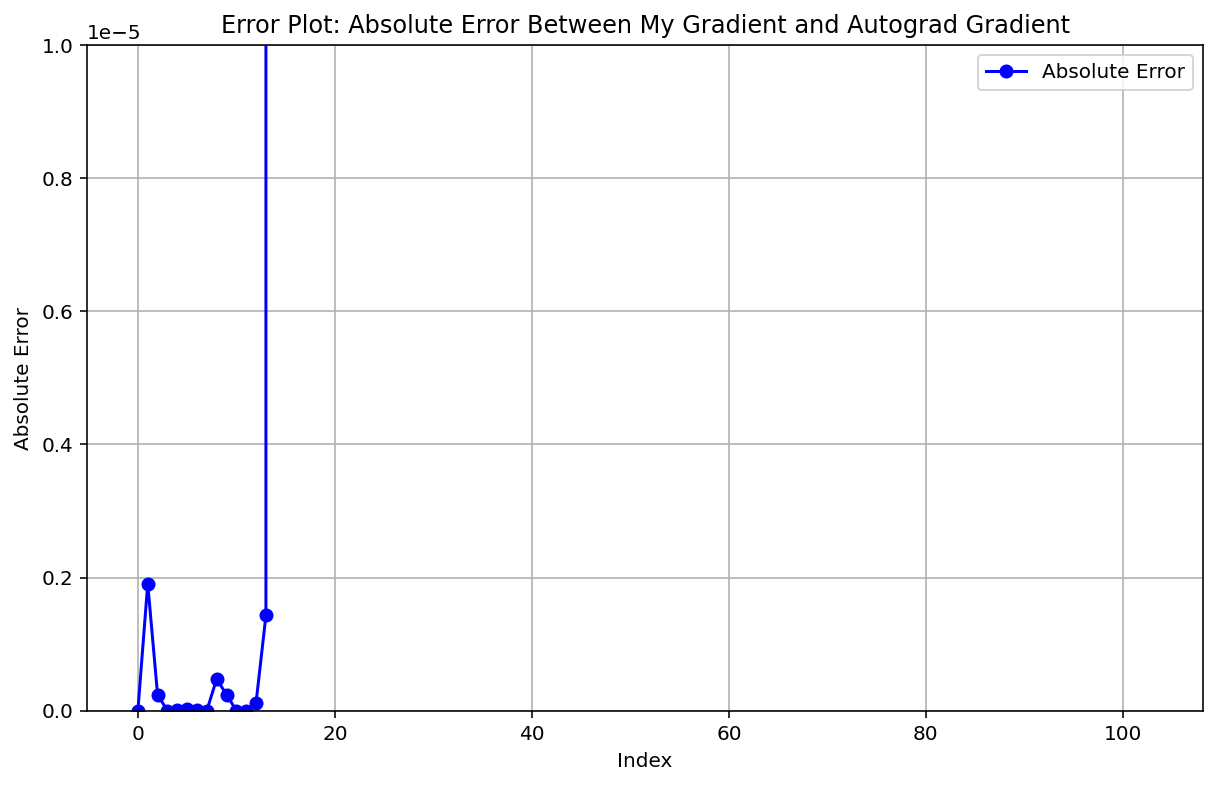

In [50]:
# Step 2: Calculate the absolute error
error = np.abs(my_grad - autograd_grad)

# Step 3: Create the error plot
plt.figure(figsize=(10, 6))
plt.plot(error, marker='o', linestyle='-', color='b', label='Absolute Error')
plt.title('Error Plot: Absolute Error Between My Gradient and Autograd Gradient')
plt.xlabel('Index')
plt.ylabel('Absolute Error')
#plt.xticks(np.arange(len( autograd_grad)), labels=[f'Value {i+1}' for i in range(len( autograd_grad))])
plt.ylim(0, 1/100000)
plt.grid()
plt.legend()
plt.show()

## Now, use a minimization routine, with the Jacobian, to optimize for theta. 

In [52]:
#gmm_args = (df, X_poly, W0)
theta =  np.zeros(4 + T*NPolyTerms)
theta = np.ones(4 + T*NPolyTerms)
theta[:4]=1/10

gmm_args = (args_ykl, args_X, args_time_index, degree, W)

#Solving using my own gradient
#theta_results_grad = opt.minimize(gmm_obj_ACF, theta0, args=gmm_args,
#                       tol=1e-14, jac=gradient_ACF, method='L-BFGS-B')
theta_results_grad = opt.minimize(gmm_obj_ACF, theta0, args=gmm_args,
                       tol=1e-14, jac=autogradient, method='L-BFGS-B')
#Solving without providing a gradient
theta_result = theta_results_grad.x


print("The GMM error is:", gmm_obj_ACF(theta_result, *gmm_args))
print("The estimates are: theta = ", theta_result)
#print("The slope of the AR(1) of productivity is: rho = ", rho)

The GMM error is: 54.02338106300145
The estimates are: theta =  [ 5.33273743e-01  8.16878982e-01  5.68241468e-01  8.61979904e-01
  8.83267181e+00  1.30534428e+00  9.16890553e-01 -1.62834714e+00
 -2.90554689e-02  2.95654987e-01 -8.38706914e-02 -9.95667360e-02
 -3.98153719e-01  2.02919814e-01  1.37681317e+01 -7.79346310e-01
  4.42717386e+00 -1.88625834e+00  3.26536537e-02 -1.45023623e-01
  5.87187713e-02  3.94195010e-01 -4.87311196e-01  1.66138967e-01
  7.99358840e+00 -1.09953227e+00  1.73154336e+00  3.57469465e-01
  7.57069066e-02 -2.13135983e-01  2.53371105e-02  1.11097709e-01
  5.39288274e-03  1.30793062e-03  5.38543317e+00 -3.42363222e-01
  1.74855152e+00  5.18150054e-02  3.23260024e-02 -7.69824743e-02
  1.15913341e-03  7.52565451e-02 -9.74200556e-02  4.21101917e-02
  9.63827972e+00 -4.73358575e-01  1.94673203e+00 -5.57067848e-01
  4.52975184e-02 -6.53190632e-02 -1.86387043e-02  6.83926575e-02
 -1.18799274e-01  7.93210328e-02  8.61249288e+00  1.76732199e-02
  1.53733314e+00 -6.773904